# CellBender `remove-background` report

This output report from `cellbender remove-background` contains a summary of the run, including counts remaining, counts removed, further analyses, and any warnings or suggestions if the run seems to be abnormal.

This HTML report is created from a jupyter notebook at 

`cellbender/cellbender/remove-background/report.ipynb`

within the CellBender codebase.  Feel free to run the notebook yourself and make any changes you see fit, or use it as a starting point for further analyses.

*The commentary in this report is generated using automated heuristics and best guesses based on hundreds of real datasets.  If any of the automated commentary in this report seems incorrect for your dataset, please submit a question or an issue at our github repository https://github.com/broadinstitute/CellBender*

Cellarium Lab .. Methods Group .. Data Sciences Platform .. Broad Institute

-----------

In [1]:
from cellbender.remove_background.report import generate_summary_plots

## Input and output files

(Modify this section if you run this notebook yourself.)

In [2]:
# Allows us to get the filenames without needing to rewrite this notebook

import os
input_file = os.environ['INPUT_FILE']
output_file = os.environ['OUTPUT_FILE']

# For the case of a simulated dataset where we have the ground truth
try:
    truth_file = os.environ['TRUTH_FILE']
except KeyError:
    truth_file = None

print(f'Input file: {input_file}')
print(f'Output file: {output_file}')
if truth_file is not None:
    print(f'Simulated truth file: {truth_file}')

Input file: /mnt/data1/10XvParse/Analysis_3/sample_10x_H2_out/counts_unfiltered/adata.h5ad
Output file: /mnt/data1/10XvParse/Analysis_3/cellbender/10x_H2.h5


# Report

### CellBender version 0.3.2

2025-09-08 12:17:11

# 10x_H2.h5

## Loaded dataset

AnnData object with n_obs × n_vars = 18390 × 39546
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_raw', 'n_cellbender'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'n_raw', 'n_cellbender'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'cellbender_embedding'
    layers: 'raw', 'cellbender'


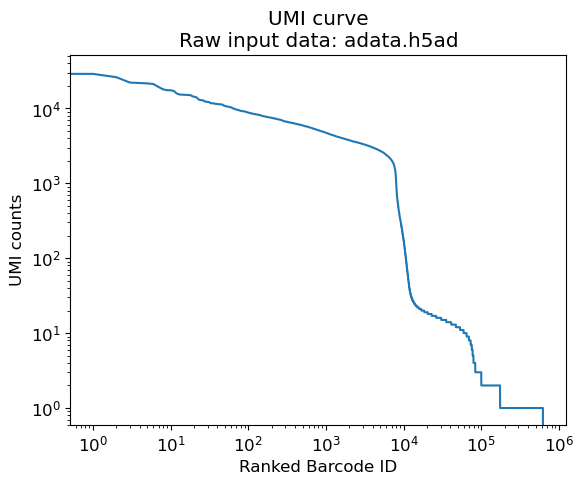

## Examine how many counts were removed in total

removed 432288 counts from non-empty droplets
removed 1.57% of the counts in non-empty droplets


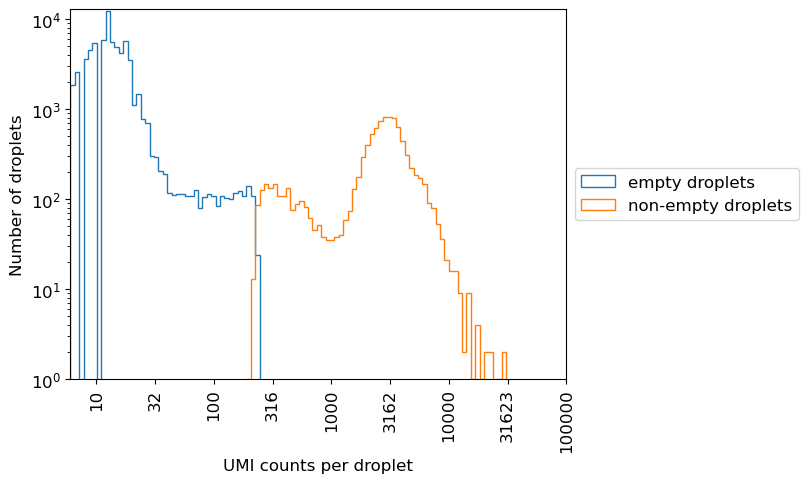

Rough estimate of expectations based on nothing but the plot above:
roughly 166132 noise counts should be in non-empty droplets
that is approximately 0.60% of the counts in non-empty droplets
with a false positive rate [FPR] of 1.0%, we would expect to remove about 1.60% of the counts in non-empty droplets


It looks like the algorithm did a great job meeting that expectation.

## Assessing convergence of the algorithm

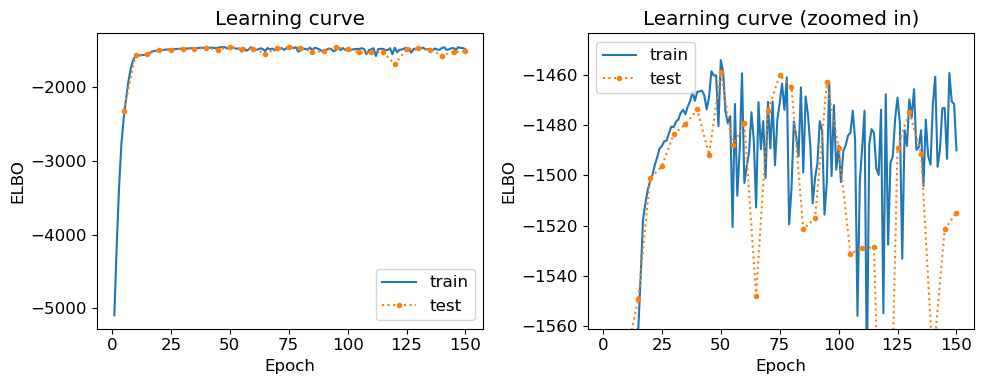

*<span style="color:gray">The learning curve tells us about the progress of the algorithm in inferring all the latent variables in our model.  We want to see the ELBO increasing as training epochs increase.  Generally it is desirable for the ELBO to converge at some high plateau, and be fairly stable.</span>*

*<span style="color:gray">What to watch out for:</span>*

*<span style="color:gray">1. large downward spikes in the ELBO (of value more than a few hundred)</span>*
*<span style="color:gray">2. the test ELBO can be smaller than the train ELBO, but generally we want to see both curves increasing and reaching a stable plateau.  We do not want the test ELBO to dip way back down at the end.</span>*
*<span style="color:gray">3. lack of convergence, where it looks like the ELBO would change quite a bit if training went on for more epochs.</span>*

**Automated assessment** --------

- *WARNING*: The training ELBO deviates quite a bit from the max value during the second half of training.

- We typically expect to see the training ELBO increase almost monotonically.  This curve seems to have a concerted period of motion in the wrong direction near epoch 111. If this is early in training, this is probably okay.

**Summary**:

This is unusual behavior, and a reduced --learning-rate is indicated.  Re-run with half the current learning rate and compare the results.

## Examine count removal per gene

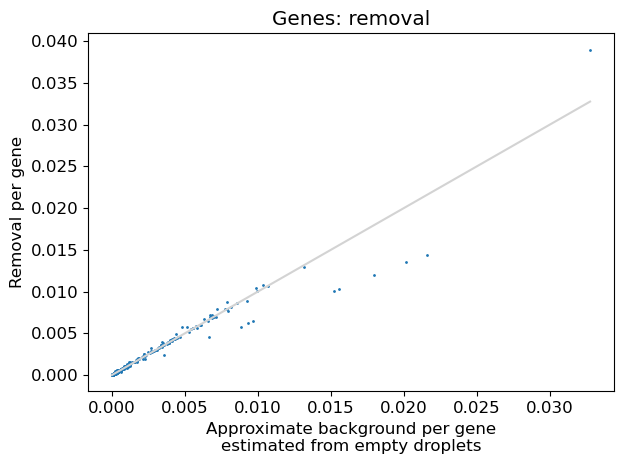

Pearson correlation coefficient for the above is 0.9592

This meets expectations.

### Table of top genes removed

Ranked by fraction removed, and excluding genes with fewer than 651 total raw counts (90th percentile)

,ambient_expression,feature_type,genome,gene_id,cellbender_analyzed,n_raw,n_cellbender,n_removed,fraction_removed,fraction_remaining,n_raw_cells,n_cellbender_cells,n_removed_cells,fraction_removed_cells,fraction_remaining_cells
gene_name,,,,,,,,,,,,,,,
ENSG00000266402.5,0.000266,NA,NA,NA,True,877,708,169,0.192702,0.807298,758,708.0,50.0,0.065963,0.934037
ENSG00000143443.10,0.000155,NA,NA,NA,True,1332,1209,123,0.092342,0.907658,1251,1209.0,42.0,0.033573,0.966427
ENSG00000155657.29,0.000068,NA,NA,NA,True,674,623,51,0.075668,0.924332,640,623.0,17.0,0.026562,0.973437
ENSG00000255198.6,0.000130,NA,NA,NA,True,1154,1067,87,0.075390,0.924610,1101,1067.0,34.0,0.030881,0.969119
ENSG00000247982.7,0.000072,NA,NA,NA,True,736,681,55,0.074728,0.925272,704,681.0,23.0,0.032670,0.967330
ENSG00000169045.17,0.000547,NA,NA,NA,True,5531,5128,403,0.072862,0.927138,5278,5128.0,150.0,0.028420,0.971580
ENSG00000170476.16,0.000029,NA,NA,NA,True,771,716,55,0.071336,0.928664,756,716.0,40.0,0.052910,0.947090
ENSG00000104852.15,0.000143,NA,NA,NA,True,1501,1395,106,0.070620,0.929380,1433,1395.0,38.0,0.026518,0.973482
ENSG00000242588.7,0.000082,NA,NA,NA,True,828,770,58,0.070048,0.929952,792,770.0,22.0,0.027778,0.972222


## Cell probabilities

The inferred posterior probability that each droplet is non-empty.

*<span style="color:gray">We sometimes write "non-empty" instead of "cell" because dead cells and other cellular debris can still lead to a "non-empty" droplet, which will have a high posterior cell probability.  But these kinds of low-quality droplets should be removed during cell QC to retain only high-quality cells for downstream analyses.</span>*

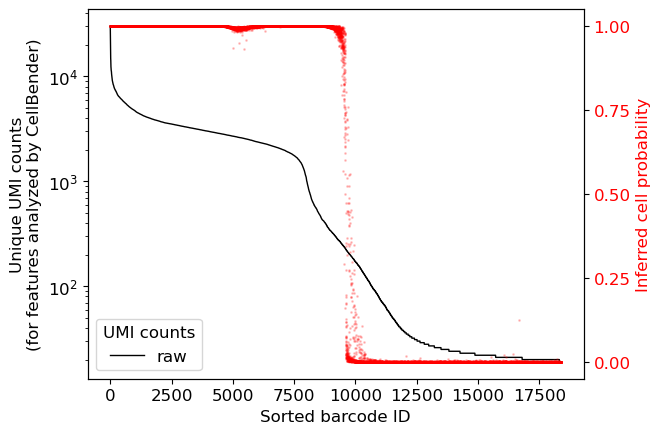

## Concordance of data before and after `remove-background`

*<span style="color:gray">The intent is to change the input data as little as possible while achieving noise removal.  These plots show general summary statistics about similarity of the input and output data.  We expect to see the data lying close to a straight line (gray).  There may be outlier genes/features, which are often those highest-expressed in the ambient RNA.</span>*

The plots here show data for inferred cell-containing droplets, and exclude the empty droplets.

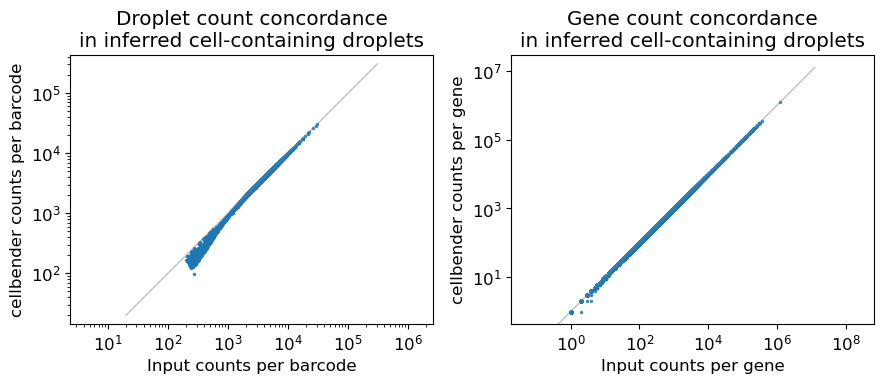

## PCA of encoded gene expression

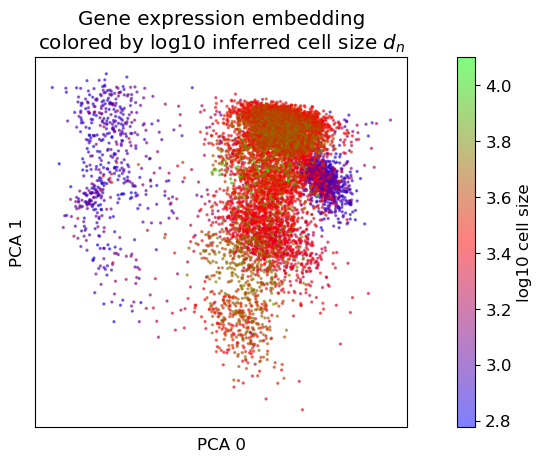

*<span style="color:gray">We are not looking for anything specific in the PCA plot of the gene expression embedding, but often we see clusters that correspond to different cell types.  If you see only a single large blob, then the dataset might contain only one cell type, or perhaps there are few counts per droplet.</span>*

# Summary of warnings:

Large deviation in training ELBO from max value late in learning.

Back-tracking in training ELBO.

In [3]:
generate_summary_plots(input_file=input_file, 
                       output_file=output_file,
                       truth_file=truth_file)